In [1]:
import warnings
import os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')
warnings.filterwarnings('ignore')

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

<a id="folders"></a>
<div style="background-color:#0a0254; font-size:135%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">
    <b><span style="color:red"> Step 1.2 </span><span style="color:white"> | Create Folders</span></b>
</div>

In [12]:
# Original dataset path
# origial_dataset_dir = '/home/nima/DataSets/Dogs_VS_Cats/train'
origial_dataset_dir = "D:/Intership tasks/cat and dog image classifier task/train"
# directory to copy data into it
# base_dir = '/home/nima/MY_JUPYTER/Train/Deep/Dogs-VS-Cats'
base_dir = "D:/Intership tasks/cat and dog image classifier task/"

In [7]:
# Create train, validation and test folder
train_dir = "D:/Intership tasks/cat and dog image classifier task/train"
# validation_dir = os.path.join(base_dir, 'validation')
test_dir = "D:/Intership tasks/cat and dog image classifier task/test"

# Create folders
# os.mkdir(train_dir)
# # os.mkdir(validation_dir)
# os.mkdir(test_dir)

In [18]:
# Createt cats and dogs folder in each recent folders
train_cats_dir = 'D:/Intership tasks/cat and dog image classifier task/train/cats'
train_dogs_dir = 'D:/Intership tasks/cat and dog image classifier task/train/dogs'
# os.mkdir(train_cats_dir)
# os.mkdir(train_dogs_dir)

# validation_cats_dir = os.path.join(validation_dir, 'cats')
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_cats_dir)
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_cats_dir)
# os.mkdir(test_dogs_dir)

2000 train ----------> 1000 cats + 1000 dogs  
1000 validation -----> 500 cats + 500 dogs  
1000 test -----------> 500 cats + 500 dogs  

#### Copy cats image

In [ ]:
# Copy 1000 cats image to train/cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dts)

# Copy 500 cats image to validatinon/cats
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames :
#     src = os.path.join(origial_dataset_dir, fname)
#     dts = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dts)

# Copy 500 cats image to test/cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dts)

#### Copy dogs image

In [14]:
# Copy 1000 dogs image to train/cats
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dts)

# Copy 500 dogs image to validatinon/cats
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames :
#     src = os.path.join(origial_dataset_dir, fname)
#     dts = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dts)

# Copy 500 dogs image to test/cats
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dts)

In [19]:
# Counts number of images in each folder
print('Total training cat images : ', len(os.listdir(train_cats_dir)))
# print('Total validation cat images : ', len(os.listdir(validation_cats_dir)))
print('Total test cat images : ', len(os.listdir(test_cats_dir)))
print('_' * 45)
print('Total training dog images : ', len(os.listdir(train_dogs_dir)))
# print('Total validation dog images : ', len(os.listdir(validation_dogs_dir)))
print('Total test dog images : ', len(os.listdir(test_dogs_dir)))

Total training cat images :  1000
Total test cat images :  500
_____________________________________________
Total training dog images :  1000
Total test dog images :  500


<a id='modeling'></a>
<div style="background-color:#0a0254; font-size:250%; text-align:center;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">
    <b><span style="color:white"> Modeling </span></b>
</div>

In [20]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

<a id="model1"></a>
<div style="background-color:#0a0254; font-size:135%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">
    <b><span style="color:red"> Step 2.1 </span><span style="color:white"> | model 1 : fast - without data generator</span></b>
</div>

In [21]:
datagen = ImageDataGenerator(rescale=1.0/255)
batch_size = 20

def extract_features(directory, sample_count) :
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(150, 150), 
        batch_size=batch_size, 
        class_mode='binary'
    )
    i=0
    for input_batch, label_batch in generator :
        features_batch = conv_base.predict(input_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = label_batch
        i += 1
        if i * batch_size >= sample_count :
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
# validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━

In [22]:
print('train shape before :      ', train_features.shape)
# print('validation shape before : ', validation_features.shape)
print('test shape before :       ', test_features.shape)

train shape before :       (2000, 4, 4, 512)
test shape before :        (1000, 4, 4, 512)


In [23]:
train_features = np.reshape(train_features, (2000, 4*4*512))
# validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [24]:
print('train shape after :      ', train_features.shape)
# print('validation shape after : ', validation_features.shape)
print('test shape after :       ', test_features.shape)

train shape after :       (2000, 8192)
test shape after :        (1000, 8192)


In [25]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu', input_dim=4*4*512))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])


history1 = model1.fit(train_features, train_labels,
                    epochs=5, 
                    batch_size=20, 
                    # validation_data=(validation_features, validation_labels)
                   )

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - acc: 0.6438 - loss: 0.6357
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - acc: 0.8090 - loss: 0.4173
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - acc: 0.8719 - loss: 0.3308
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - acc: 0.8844 - loss: 0.2901
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - acc: 0.8998 - loss: 0.2589


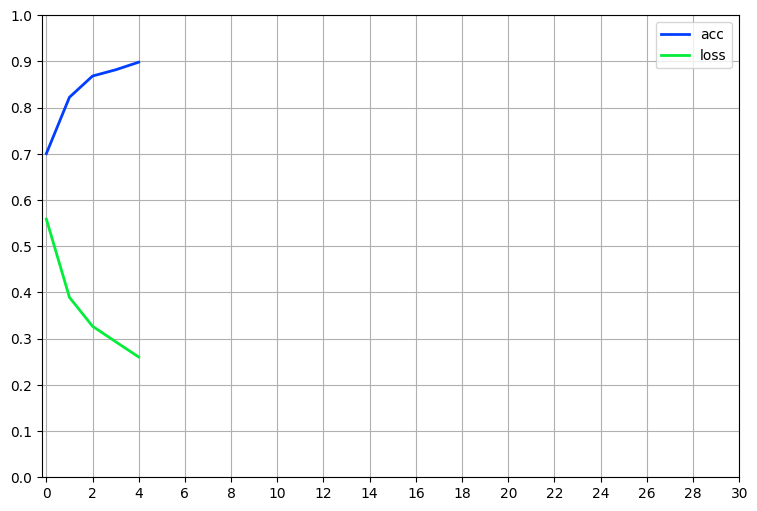

In [26]:
pd.DataFrame(history1.history).plot(figsize=(9, 6), linewidth=2)
plt.xticks(range(0, 31, 2))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

<a id="model2"></a>
<div style="background-color:#0a0254; font-size:135%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">
    <b><span style="color:red"> Step 2.2 </span><span style="color:white"> | model 2 - with data generator - SLOW</span></b>
</div>

In [27]:
from tensorflow.keras.layers import Lambda

model2 = models.Sequential()
model2.add(Lambda(lambda x: x, input_shape=(150, 150, 3)))
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))


In [28]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,910,017 (72.14 MB)

 Trainable params: 18,910,017 (72.14 MB)

 Non-trainable params: 0 (0.00 B)

#### Freeze conv_base

In [29]:
print('number of trainable weights before freezeing: ', len(model2.trainable_weights))

conv_base.trainable = False

print('number of trainable weights after freezeing: ', len(model2.trainable_weights))

number of trainable weights before freezeing:  30
number of trainable weights after freezeing:  4


In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
# validation_generator = validation_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(150, 150),
#     batch_size=20,
#     class_mode='binary'
# )

Found 2000 images belonging to 2 classes.


In [31]:
# Compile
model2.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), 
              loss='binary_crossentropy', 
              metrics=['acc']
             )

In [32]:
history2 = model2.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    # validation_data=validation_generator,
    # validation_steps=50
)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - acc: 0.6020 - loss: 0.6436
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - acc: 0.7669 - loss: 0.4820
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - acc: 0.8083 - loss: 0.4172


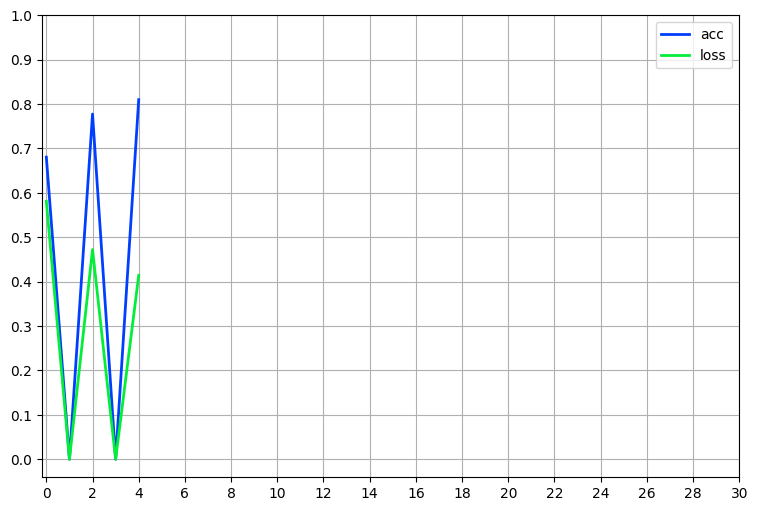

In [33]:
pd.DataFrame(history2.history).plot(figsize=(9, 6), linewidth=2)
plt.xticks(range(0, 31, 2))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

<a id="model3"></a>
<div style="background-color:#0a0254; font-size:135%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">
    <b><span style="color:red"> Step 2.3 </span><span style="color:white"> | model 3 : Fine_Tune</span></b>
</div>

In [34]:
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [35]:
for layer in conv_base.layers :
    print(layer.name)

input_layer
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [36]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers :
    if layer.name == 'block5_conv1' :
        set_trainable = True
    if set_trainable :
        layer.trainable = True
    else :
        layer.trainable = False

In [37]:
# Compile
model3.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5), 
              loss='binary_crossentropy', 
              metrics=['acc']
             )

history3 = model3.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=4,
    # validation_data=validation_generator,
    # validation_steps=50
)

Epoch 1/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - acc: 0.6237 - loss: 0.6368
Epoch 2/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - acc: 0.8197 - loss: 0.4118
Epoch 4/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - acc: 0.0000e+00 - loss: 0.0000e+00


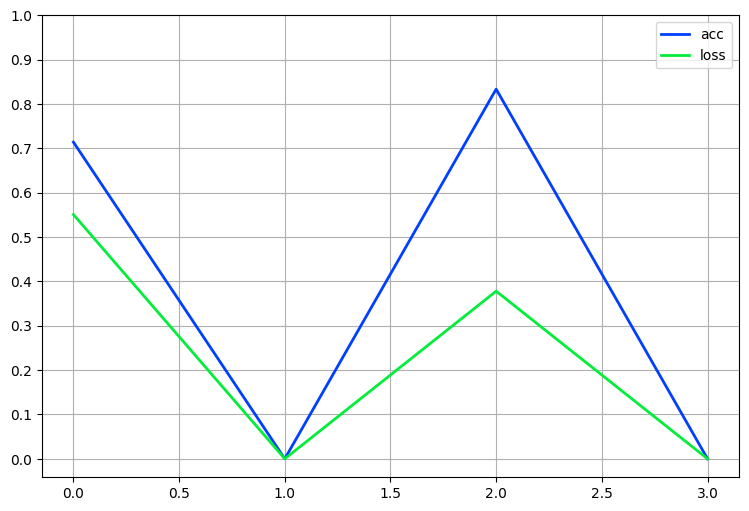

In [38]:
pd.DataFrame(history3.history).plot(figsize=(9, 6), linewidth=2)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

In [39]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_loss, test_acc = model3.evaluate(test_generator, steps=50)
print('test acc : ', test_loss)
print('test loss : ', test_acc)

Found 1000 images belonging to 2 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - acc: 0.8902 - loss: 0.2736
test acc :  0.27694982290267944
test loss :  0.8820000290870667


<a id="model4"></a>
<div style="background-color:#0a0254; font-size:135%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">
    <b><span style="color:red"> Step 2.4 </span><span style="color:white"> | model 4 : activation = elu</span></b>
</div>

In [40]:
model4 = models.Sequential()
model4.add(conv_base)
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='elu'))
model4.add(layers.Dense(1, activation='sigmoid'))

In [41]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers :
    if layer.name == 'block5_conv1' :
        set_trainable = True
    if set_trainable :
        layer.trainable = True
    else :
        layer.trainable = False

In [42]:
# Compile
model4.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5), 
              loss='binary_crossentropy', 
              metrics=['acc']
             )

history4 = model3.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=4,
    # validation_data=validation_generator,
    # validation_steps=50
)

Epoch 1/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - acc: 0.8517 - loss: 0.3173
Epoch 2/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - acc: 0.8791 - loss: 0.3011
Epoch 4/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - acc: 0.0000e+00 - loss: 0.0000e+00


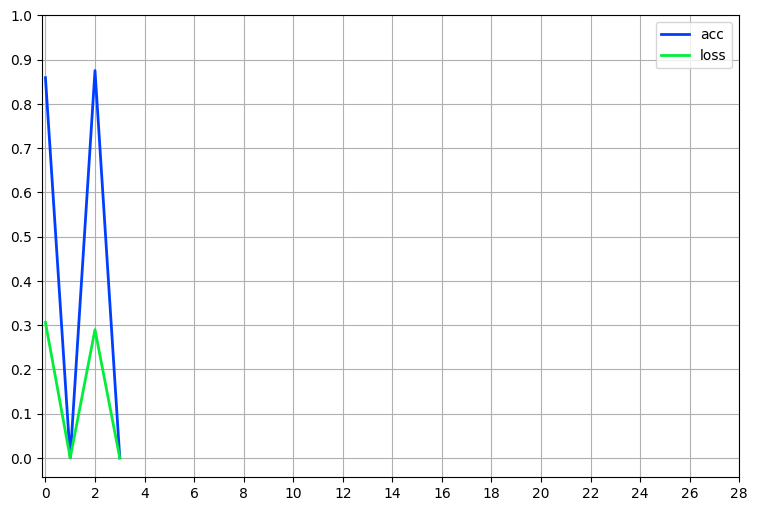

In [43]:
pd.DataFrame(history4.history).plot(figsize=(9, 6), linewidth=2)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(range(0, 30, 2))
plt.grid()
plt.show()

Base on above plot, we can reach best performance with 5 epoch

In [44]:
test_loss, test_acc = model3.evaluate(test_generator, steps=50)
print('test acc : ', test_loss)
print('test loss : ', test_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 935ms/step - acc: 0.8960 - loss: 0.2453
test acc :  0.225259929895401
test loss :  0.8999999761581421
